<a href="https://colab.research.google.com/github/tanishataranoon/NLP-projects/blob/main/NLP_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

In [ ]:
from collections import Counter

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%matplotlib inline

In [ ]:
import pickle

Section 1. part a. Load and Understanding the **dataset** **bold text**

In [ ]:
# load the data
data = pd.read_excel("/content/Canva_reviews.xlsx")

# New Section

In [ ]:
# take a peak at data
data.head(3)

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files


In [ ]:
print(data.columns)

Index(['reviewId', 'userName', 'userImage', 'review', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'Sentiment',
       'Sub Category', 'Sub Category_test'],
      dtype='object')


In [ ]:
# dimension of the dataset
data.shape

(1500, 13)

In [ ]:
# data types of columns / features
data.dtypes

,0
reviewId,object
userName,object
userImage,object
review,object
score,int64
thumbsUpCount,int64
reviewCreatedVersion,object
at,datetime64[ns]
replyContent,object
repliedAt,datetime64[ns]


Checking Null Values

In [ ]:
# total null values in each column
data.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
review,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,977
repliedAt,977


In [ ]:
#rows_with_nan = data[data.isna().any(axis=1)]
#print(rows_with_nan)
#rows_with_nan.head()

In [ ]:
data.loc[155, "review"]

'It’s very helpful app for creating some beautiful creatures... outstanding...'

In [ ]:
data.loc[155, "Sentiment"]

'Positive'

In [ ]:
print(data.iloc[[1495]])

                                               reviewId  userName  \
1495  gp:AOqpTOHhnXMpylU3f-1V1KbR2hwWArOilxPlKI6K4xY...  Reen Ali   

                                              userImage  \
1495  https://play-lh.googleusercontent.com/a-/AOh14...   

                                                review  score  thumbsUpCount  \
1495  Absolutely amazing and a lifesaver for teachers.      5              0   

     reviewCreatedVersion                  at replyContent repliedAt  \
1495              2.127.0 2021-09-07 02:45:51          NaN       NaT   

     Sentiment     Sub Category Sub Category_test  
1495  Positive  extremely_happy               NaN  


Count and percentage of Target variable

In [ ]:
data["userName"].describe()

,userName
count,1500
unique,1500
top,MeLLy EcK
freq,1


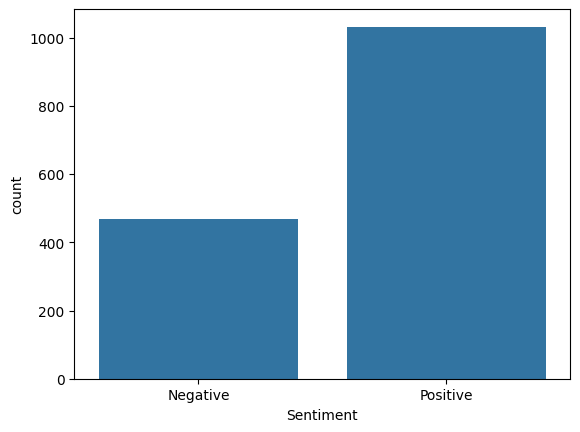

In [ ]:
sns.countplot(x="Sentiment", data=data)
plt.show()

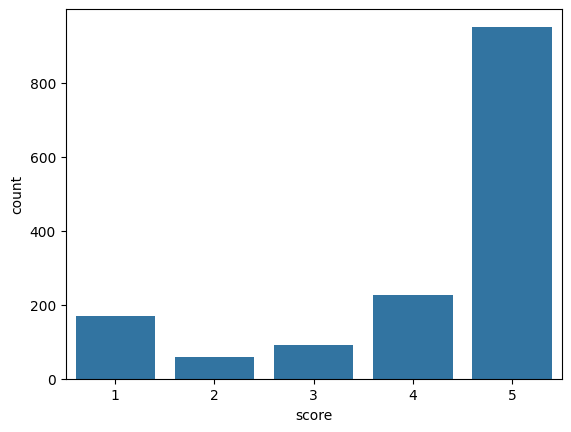

In [ ]:
sns.countplot(x="score", data=data)
plt.show()

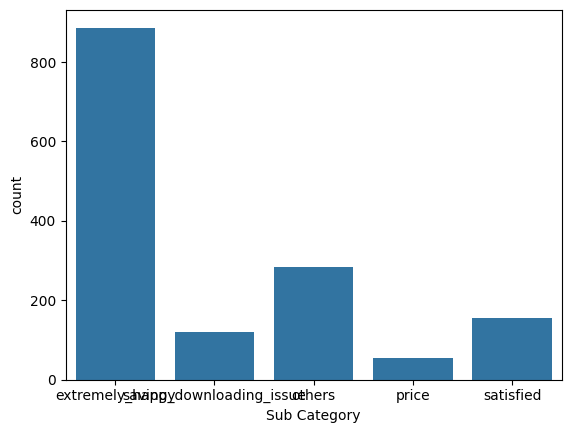

In [ ]:
sns.countplot(x="Sub Category", data=data)
plt.show()

In [ ]:
data["Sentiment"].value_counts()

,count
Sentiment,
Positive,1032
Negative,468


In [ ]:
468/(1032+468)

0.312

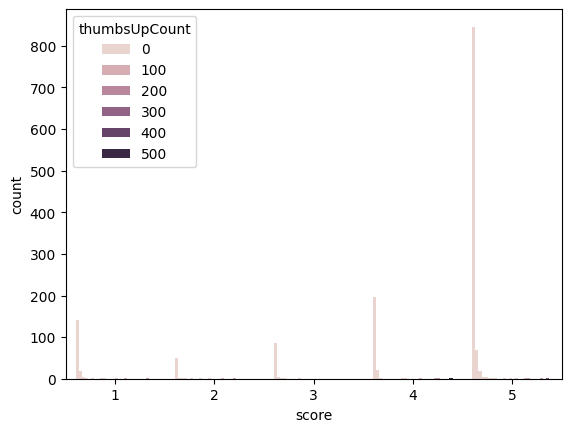

In [ ]:
# Is score related to sentiment?

sns.countplot(x="score", data=data, hue="thumbsUpCount")
plt.show()

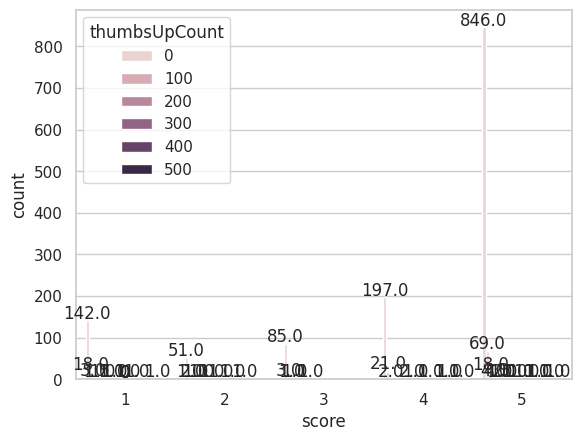

In [ ]:
# Same plot, but showing the counts per score
sns.set(style="whitegrid")
# Create the countplot
ax = sns.countplot(x="score", data=data, hue="thumbsUpCount")
# Add data labels
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
              ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Show the plot
plt.show()

In [ ]:
# create a new column 'len' in the dataframe data
data["len"] = data["review"].apply(len)

In [ ]:
data["len"].describe()

,len
count,1500.000000
mean,86.468667
std,55.681355
min,20.000000
25%,54.000000
50%,75.000000
75%,102.000000
max,498.000000


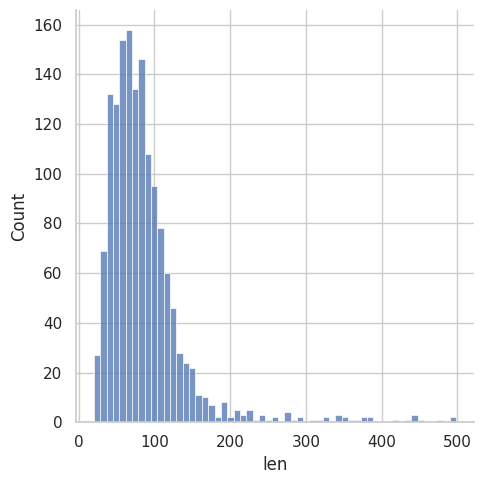

In [ ]:
sns.displot(data["len"])
plt.show()

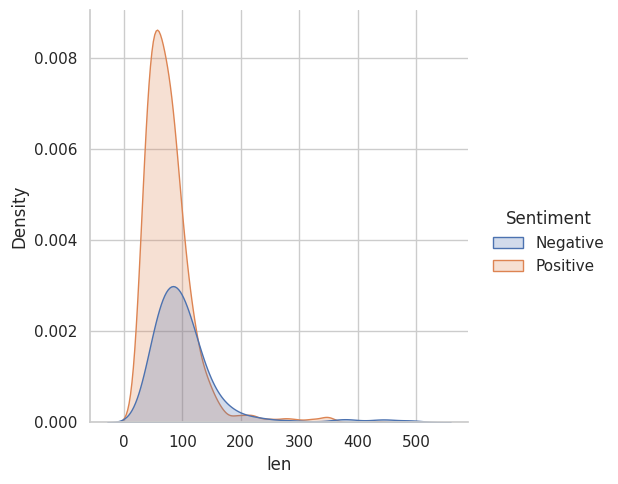

In [ ]:
sns.displot(data=data, x="len", hue="Sentiment", kind="kde", fill=True)
plt.show()

In [ ]:
data = data[["review", "Sentiment"]]

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Nothing to update.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative

In [ ]:
data.loc[13, "review"]

# Tokenization (NLP) is the process of breaking down text into smaller units, or tokens. %%

#sent_tokenize = break the text in to sentence by sentence

In [ ]:
sent_tokenize(data.loc[13,"review"])

['Unable to save my work.', 'Nothing works :(']

Word_tokenizer = break the text into word by word

In [ ]:
word_tokenize(data.loc[13, "review"])

['Unable', 'to', 'save', 'my', 'work', '.', 'Nothing', 'works', ':', '(']

In [ ]:
# copying the review column from the dataframe data in which we have only 2 columns
reviews = list(data["review"])

In [ ]:
reviews[13]

'Unable to save my work. Nothing works :('

In [ ]:
reviews[13].lower()

'unable to save my work. nothing works :('

In [ ]:
reviews[13]

'Unable to save my work. Nothing works :('

In [ ]:
reviews_lower = [r.lower() for r in reviews]
reviews_lower[13]

'unable to save my work. nothing works :('

In [ ]:
reviews_lower = []
for r in reviews:
  reviews_lower.append(r.lower())

In [ ]:
# now we create another list of lists from revws
tokens = [word_tokenize(r) for r in reviews_lower]
tokens[13]

['unable', 'to', 'save', 'my', 'work', '.', 'nothing', 'works', ':', '(']

In [ ]:
len(tokens)

1500